# Применение алгоритмов кластерного анализа

В данной работе будут рассмотрены методы:


*   Иерархической (агломеративной) кластеризации
*   Нечёткой кластеризации



In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
!pip install scikit-plot
import scikitplot as skplt
from scipy.cluster.hierarchy import dendrogram, linkage


# Исходные данные

Создаём матрицу, состоящую из случайных чисел, распределённых по биномиальному закону (3 двумерных массива по 100 значений каждый, где первый массив – это X, а второй – Y, которые объединяются в 2 вектора, а после в общую матрицу, с которой мы и будем дальше работать)

In [50]:
c1 = np.random.binomial(100, 0.5, (2, 100))
c2 = np.random.binomial(100, 0.5, (2, 100)) + 50
c3 = np.random.binomial(100, 0.5, (2, 100)) + 100


xs = np.concatenate((c1[0], c2[0], c3[0]))
ys = np.concatenate((c1[1], c2[1], c3[1]))
xsys = [[xs[i], ys[i]] for i in range(len(xs))]
xy = np.array(xsys)
print(xy)

[[ 53  57]
 [ 49  53]
 [ 51  52]
 [ 49  49]
 [ 46  51]
 [ 53  56]
 [ 49  58]
 [ 45  56]
 [ 45  58]
 [ 43  53]
 [ 43  49]
 [ 44  55]
 [ 49  47]
 [ 43  45]
 [ 40  49]
 [ 43  46]
 [ 50  49]
 [ 49  42]
 [ 61  49]
 [ 49  50]
 [ 39  52]
 [ 50  49]
 [ 51  52]
 [ 48  46]
 [ 49  60]
 [ 48  49]
 [ 59  47]
 [ 51  46]
 [ 48  54]
 [ 49  52]
 [ 45  48]
 [ 45  59]
 [ 62  59]
 [ 46  51]
 [ 61  48]
 [ 46  49]
 [ 52  48]
 [ 43  54]
 [ 46  54]
 [ 46  42]
 [ 49  52]
 [ 59  49]
 [ 53  51]
 [ 58  41]
 [ 49  47]
 [ 45  44]
 [ 44  43]
 [ 48  48]
 [ 52  48]
 [ 49  55]
 [ 47  42]
 [ 59  53]
 [ 44  54]
 [ 49  52]
 [ 50  54]
 [ 58  51]
 [ 43  57]
 [ 45  45]
 [ 36  51]
 [ 54  55]
 [ 50  44]
 [ 48  37]
 [ 49  51]
 [ 54  60]
 [ 47  54]
 [ 58  52]
 [ 59  46]
 [ 47  51]
 [ 50  51]
 [ 56  51]
 [ 39  44]
 [ 53  50]
 [ 50  45]
 [ 50  41]
 [ 58  59]
 [ 50  54]
 [ 49  47]
 [ 38  52]
 [ 44  54]
 [ 61  54]
 [ 57  55]
 [ 50  45]
 [ 49  61]
 [ 42  50]
 [ 48  43]
 [ 57  46]
 [ 58  50]
 [ 56  48]
 [ 52  47]
 [ 49  54]
 [ 57  59]

In [51]:
# Класс создан, чтобы находить центры кластеров (наследует класс AgglomerativeClustering(n_clusters=n))
class AgglomerativeClusteringWithPredict(AgglomerativeClustering):
    def __init__(self, fname, lname):
        super().__init__(fname, lname)

    def __init__(self, n_clusters):
        super().__init__(n_clusters)

    """def __init__(self, n_clusters, affinity, linkage):
        super().__init__(n_clusters, affinity=affinity, linkage=linkage)"""

    def predict(self, data):
        self.labels_ = super().fit_predict(data)

    def makeClusterCenterList(self):
        temp = []

        for a in set(self.labels_):
            x = self.df[self.df['AgglomerativeClusteringWithPredictLabels'] == a].mean(axis=0)
            temp.append(list(x[:-1]))
        del (self.df)
        self.cluster_centers_ = np.array(temp)

    def fit_predict(self, df):
        self.labels_ = super().fit_predict(df)
        self.df = df.copy()
        self.df['AgglomerativeClusteringWithPredictLabels'] = self.labels_
        self.makeClusterCenterList()
        return self.labels_

    df = pd.DataFrame()
    cluster_centers_ = []
    labels_ = []

# Иерархичекая кластеризация (агломеративная)

Агломеративная кластеризация – это мощный и гибкий алгоритм, который выполняет кластеризацию иерархически. В агломеративной кластеризации все наблюдения начинаются епе одноэлементные кластеры. Далее кластеры, удовлетворяющие некоторым критериям, объединяются. Этот процесс повторяется до тех пор, пока не будет достигнута некоторая конечная точка.

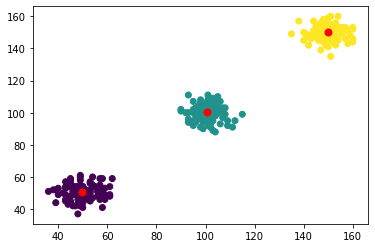

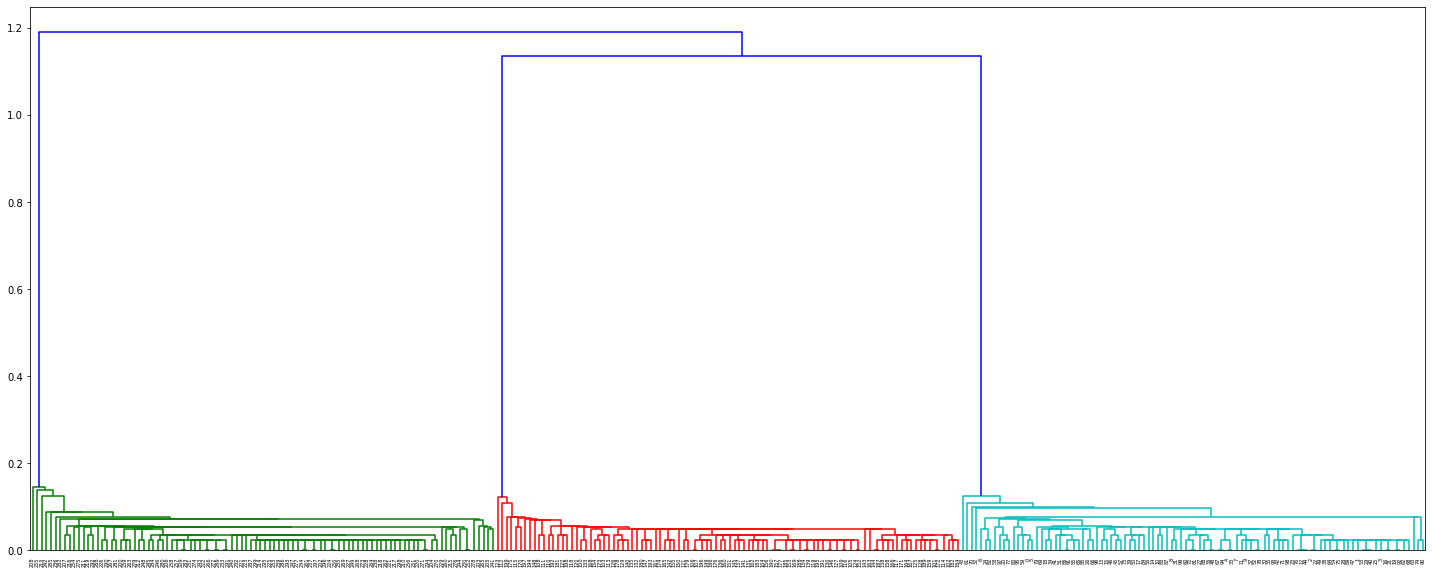

In [52]:
"""
#-----------------------------------------------------------------------------------
# ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ
#-----------------------------------------------------------------------------------
"""
pdxy = pd.DataFrame(xy)
cluster = AgglomerativeClusteringWithPredict(n_clusters=3)
#cluster = AgglomerativeClusteringWithPredict(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(pdxy)
plt.scatter(xy[:,0],xy[:,1], c=cluster.labels_)
plt.scatter(*cluster.cluster_centers_.transpose(), c='red', linewidth=2)
plt.show()

# ПОСТРОЕНИЕ ДЕНДРОГРАММЫ
linked = linkage(xy, 'single', metric='seuclidean')
plt.figure(figsize=(25, 10))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

*Иерархическая кластеризация поддаётся естественному графическому отображению в виде дерева, которое называется ДЕНДРОГРАММОЙ.*

# Нечёткая кластеризация (Fuzzy C-means)

Нечёткая кластеризация – это усовершенствованный метод k-средних, при котором для каждого элемента израссматриваемого множества расситывается степень его принадлежности каждому из кластеров.

Метод C-means позволяет разбить имеющееся множество элементов мощностью N на заданное число нечётких множеств k.

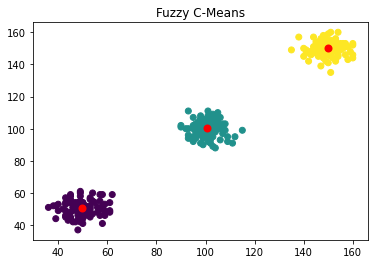

In [53]:
"""
#-----------------------------------------------------------------------------------
# НЕЧЁТКАЯ КЛАСТЕРИЗАЦИЯ
#-----------------------------------------------------------------------------------
"""

!pip install fuzzy-c-means
from fcmeans import FCM

my_model = FCM(n_clusters=3)
my_model.fit(xy)
centers = my_model.centers
labels = my_model.predict(xy)

plt.title("Fuzzy C-Means")
plt.scatter(xy[:,0],xy[:,1], c=labels)
plt.scatter(*centers.transpose(), c='red', linewidth=2)
plt.show()

# Визуализация и сравнение результатов



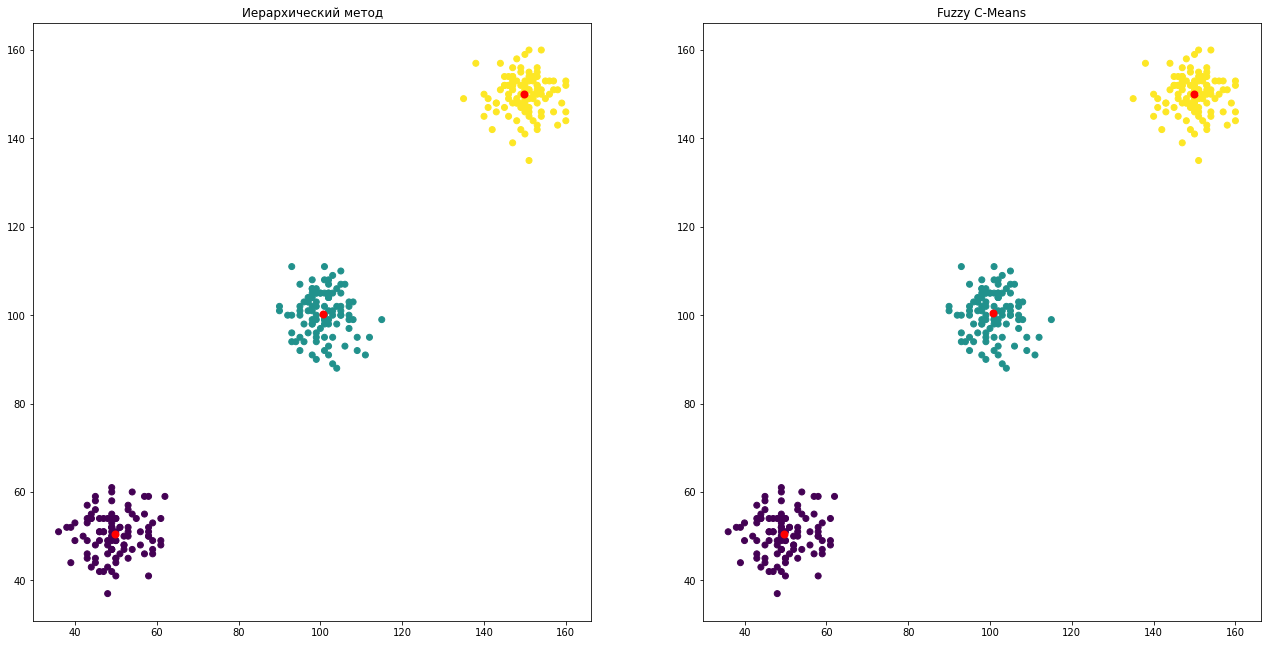

In [54]:
plt.figure(figsize=(22, 11))
plt.subplot(1, 2, 1)
plt.title("Иерархический метод")
plt.scatter(xy[:,0],xy[:,1], c=cluster.labels_)
plt.scatter(*cluster.cluster_centers_.transpose(), c='red', linewidth=2)
plt.subplot(1, 2, 2)
plt.title("Fuzzy C-Means")
plt.scatter(xy[:,0],xy[:,1], c=labels)
plt.scatter(*centers.transpose(), c='red', linewidth=2)
plt.show()



> **График силуэта** отображает меру того, насколько близко каждая точка в одном кластере находится к точкам в соседних кластерах, и, таким образом, обеспечивает способ визуальной оценки количества кластеров. Эта мера имеет диапазон [-1, 1].



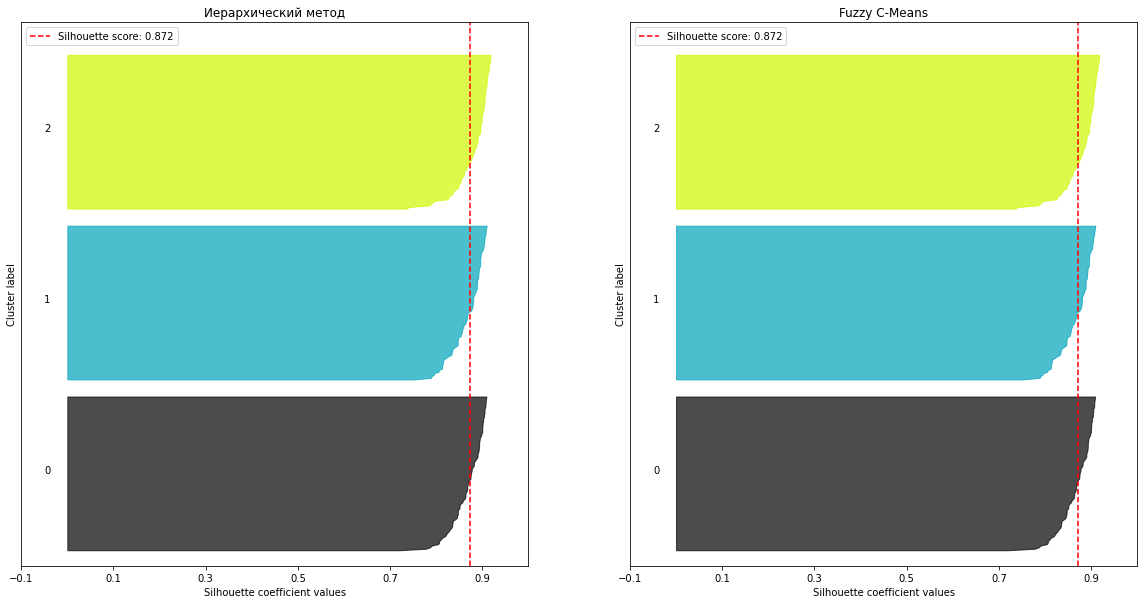

In [55]:
#-----------------------------------------------------------------------------------
# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ С ПОМОЩЬЮ СИЛУЭТА
#-----------------------------------------------------------------------------------
cluster_labels = cluster.fit_predict(pdxy)
plt.figure(figsize=(20, 10))
skplt.metrics.plot_silhouette(xy, cluster_labels, ax=plt.subplot(1, 2, 1) ,title="Иерархический метод")
skplt.metrics.plot_silhouette(xy, labels, ax=plt.subplot(1, 2, 2) , title="Fuzzy C-Means")
plt.show()
#-----------------------------------------------------------------------------------


actual
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Иерархический метод
predicted
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

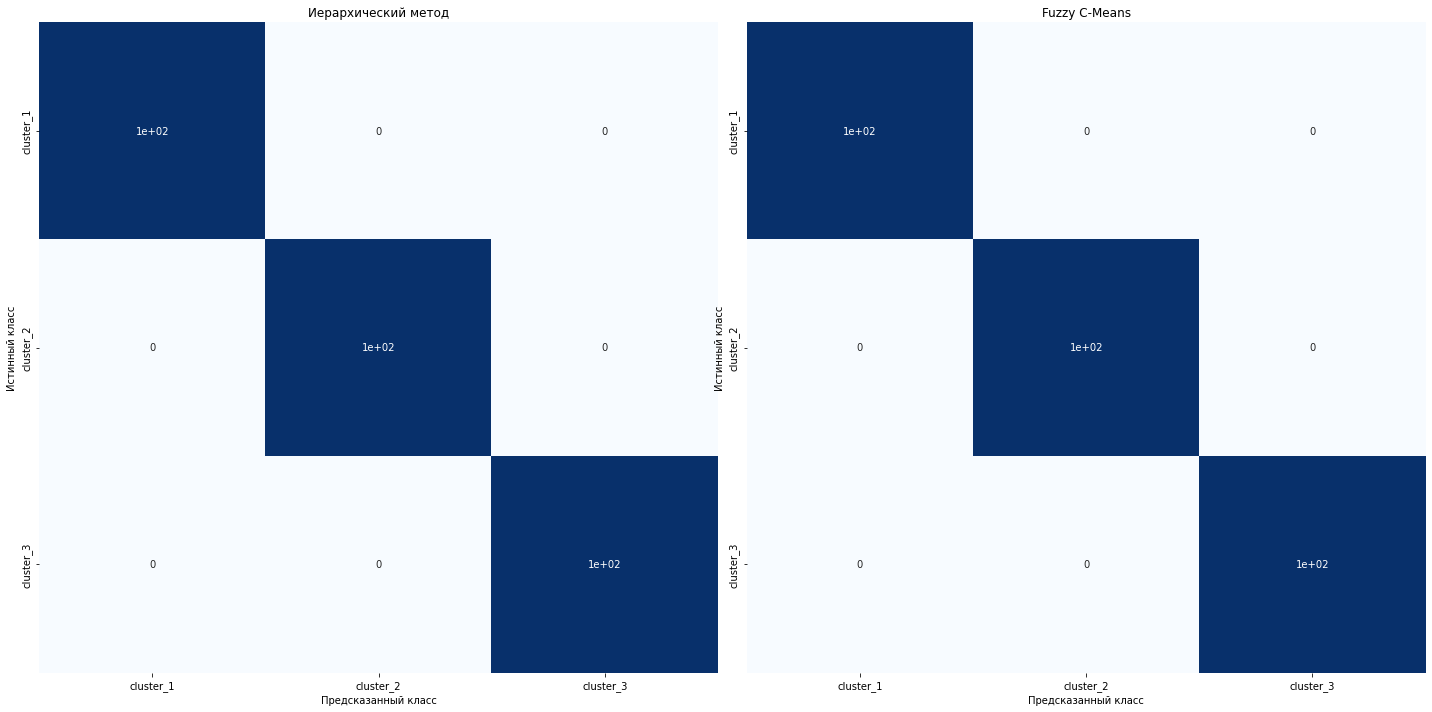

In [56]:
#-----------------------------------------------------------------------------------
# МАТРИЦА ОШИБОК
#-----------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = []
count = 0
for j in range(300):
    if (count >= 0) & (count < 100):
        actual.append(0)
        count += 1
    if (count >= 100) & (count < 200):
        actual.append(1)
        count += 1
    if (count >= 200) & (count < 300):
        actual.append(2)
        count += 1
print("actual")
print(actual) # 300 значений

print("")
print("Иерархический метод")
predicted = cluster.labels_ # 300 значений
print("predicted")
print(predicted)
error_matrix = confusion_matrix(actual, predicted)
print ('Матрица ошибок:')
print(error_matrix)
# ---------------------------------
print ('Оценка точности:',accuracy_score(actual, predicted))
print('Классификационный отчёт: ')
print (classification_report(actual, predicted))
#-----------------------------------------------------------------------------------

# Отображение в виде тепловой карты
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
cluster_names = ["cluster_1", "cluster_2", "cluster_3"]
dataframe = pd.DataFrame(error_matrix, index=cluster_names, columns=cluster_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Иерархический метод")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")


#-----------------------------------------------------------------------------------
# МАТРИЦА ОШИБОК ДЛЯ МЕТОДА НЕЧЁТКОЙ КЛАСТЕРИЗАЦИИ
#-----------------------------------------------------------------------------------
print("")
print("Fuzzy C-Means")
predicted = labels # 300 значений
print("predicted")
print(predicted)
error_matrix = confusion_matrix(actual, predicted)
print ('Матрица ошибок:')
print(error_matrix)
# ---------------------------------
print ('Оценка точности:',accuracy_score(actual, predicted))
print('Классификационный отчёт: ')
print (classification_report(actual, predicted))
#-----------------------------------------------------------------------------------

# Отображение в виде тепловой карты
plt.subplot(1, 2, 2)
cluster_names = ["cluster_1", "cluster_2", "cluster_3"]
dataframe = pd.DataFrame(error_matrix, index=cluster_names, columns=cluster_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Fuzzy C-Means")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()